# Modelos de Cazador-Presa Discretos

### Rodolfo Arturo González Trillo

In [1]:
using Plots, LaTeXStrings, TaylorSeries

include("AutomDiff_V2.jl")
import AD: Dual, xdual
pyplot(grid=:false, size=(800,600))

Plots.PyPlotBackend()

In [1]:
using PyPlot

Los Modelos de Cazador-Presa son aquellos que representan la interacción de dos especies, una como cazador y otra como presa utilziados principalmente en ecología y biología pero con un sinúmero de aplicaciones en otras áreas de física, química y hasta economía.

En ecología se llaman modelos de "cazador—presa" o de "planta—hervíboro". En este trabajo se les llama, modelos de "Cazador-Presa".

La forma continua de éstos modelos lleva el nombre de ecuaciones de "Lotka-Volterra". La forma discreta es un mapeo de dos dimensiones de la forma [_(Kang et al, 2008)_](http://www.tandfonline.com/doi/abs/10.1080/17513750801956313 "Kang Y., Armbruster D., Kuang Y., 2008: Dynamics of a plant–herbivore model. Journal of Biological Dynamics, Vol 2. No. 2"):

$$
\begin{aligned}
C_{n+1} &= P_n e^{r \left( 1-\frac{P_n}{P_{max}} \right)}\left( 1-e^{-aC_n}\right) \\
P_{n+1} &= P_n e^{r \left( 1-\frac{P_n}{P_{max}} \right)-aC_n}
\end{aligned}
$$

Donde $C_n$ y $P_n$ son, respectivamente, la población de los cazadores y las presas en sucesivas generaciones $n$, $a$ es una constante de la tasa de crecimiento de los cazadores.

Para este modelo se realizan las siguientes suposiciones:
1. $P_n$ representa la población de presas después de los ataque de los cazadores. $C_n$ representa la población de los cazadores antes de que mueran al final de la temporada $n$.

2. Sin un cazador el número de presas sigue la dinámica del modelo de _Ricker_:

$$
P_{n+1}=P_n e^{r \left( 1-\frac{P_n}{P_{max}} \right)}
$$

Un mapeo de dos dimensiones que define el crecimiento de una especie a una tasa de crecimiento $r$ y una capacidad de carga del ecosistema de $P_{max}$ individuos. El módelo de Ricker define cuantas presasa estarán disponibles para el consumo de los depredadores.

3. Se asume que los cazadores comerán a las presas de manera aleatoria. El parámetro $a$ es una constante que correlaciona la cantidad total de presas que el carnívoro consume, a mayor $a$ mayor cantidad de presas son consumidas.

Desupués de un ataque de los cazadores, la población de presas es reducida por una fracción $ e^{-aC_n}$, por eso tenemos:

$$
P_{n+1}=P_n e^{r \left( 1-\frac{P_n}{P_{max}} \right)-aC_n}
$$

Realizamos los cambios de variables siguientes:

$$
\begin{aligned}
x_n &= \frac{P_n}{P_{max}} \\
y_n &= \frac{C_n}{P_{max}} \\
a &\rightarrow aP_{max}
\end{aligned}
$$

Lo que nos lleva al sistema adimensional:

$$
\begin{aligned}
x_{n+1} &= x_n e^{r \left[ 1-x_n \right]-a y_n} \\ 
y_{n+1} &= x_n e^{r \left[ 1-x_n \right]}\left[1-e^{-ay_n}\right]
\end{aligned}
$$


In [2]:
"""
mapeo_CP( v0, r, a, n)
Dada una población inicial v0=[x_0, y_0] de cazadores y presas, 
realiza el mapeo en dos dimensiones para un módelo de Cazador-Presa para n generaciones, con las
constantes r, la tasa de crecimiento poblacional de los cazadores y a la de conversión de presas en
predadores, devolviendo el vector [x_n,y_n], la población de los cazadores y de las presas después 
de n generaciones.
"""

function mapeo_CP(v0::Array{Float64,1}, r::Float64, a::Float64, n::Int64)
    
    xi=v0[1]
    yi=v0[2]
    
    for i in 1:n
        xii = xi*exp(r*(1-xi)-a*yi)
        yii = xi*exp(r*(1-xi))*(1-exp(-a*yi))
        
        xi = xii
        yi = yii
    end
    
    xi,yi
end

mapeo_CP

El trabajo que se realizará es muy similar al de las clases y tareas, sólo que se extiende para dos dimensiones.

# Puntos fijos

Es fácil ver que si $x_0=0$ entonces $x_n=0$, para $n>1$, lo mismo pasa en el caso de la variable $y$. Asumimos que $a>0$ y $r>0$. Entonces el punto $[0.0,0.0]$ es un punto fijo.

Si nos movemos alrededor de este punto.


In [24]:
mapeo_CP([0.0,0.0], 1.0, 1.0, 1000)

(0.0,0.0)

In [25]:
mapeo_CP([0.01,0.01], 1.0, 1.0, 1000)

(0.9999990362975434,9.637019923176526e-7)

In [29]:
mapeo_CP([0.001,0.001], 1.0, 1.0, 1000)

(0.9999781402171279,2.1859543938402344e-5)

In [33]:
mapeo_CP([0.0001,0.0001], 1.0, 1.0, 1000)

(1.0,0.0)

Observamos que mientras la componente $y$ de los cazadores se matiene cerca de 0.0, la de las presas se aleja rápidamente de este valor. Se trata pues, de un punto silla, atractor en el eje $y$ y repulsor en el eje $x$. Esto implica que en este modelo las presas no pueden morir.

También observamos que cuando no hay cazadores, las presas tienden a la máxima población, el punto $[1.0,0.0]$, otro punto fijo.

In [20]:

range = 0.0:2.0^-5:3.0
l = length(range)
P_max = 100.0
x0 = [7,3]./P_max
n = 10000
matx = zeros(length(range),length(range))
maty = zeros(length(range),length(range))

for ai in 1:l
    for ri in 1:l
        
        a=range[ai]
        r=range[ri]
        
        x,y = mapeo_CP(x0, r, a, n)
        matx[ri,ai] = x
        maty[ri,ai] = y
        
    end
end

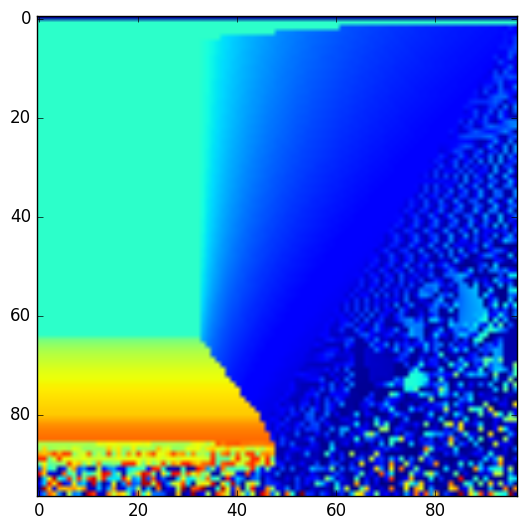

PyObject <matplotlib.image.AxesImage object at 0x0000000001BA3048>

In [21]:
imshow(matx)